In [2]:
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.6 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.6 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.6 MB 2.6 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.6 MB 2.3 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/11.6 MB 2.7 MB/s eta 0:00:04
   --------------- ------------------------ 4.5/11.6 MB 3.5 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.6 MB 3.6 MB/s eta 0:00:02
   ------------------- -------------------- 5.8/11.6 MB 3.6 MB/s eta 0:00:02
   ----------------------- ---------------- 6.8/11.6 MB 3.6 MB/s eta 0:00:02
   --------------------------- ------------ 7.9/11.6 MB 3.7 MB/s eta 0:00:01
   ------------------------------- -------- 9.2/11.6 MB 3.9 MB/s eta 0:00:01
   ----------

In [4]:
!pip install numpy

In [6]:
import pandas as pd
df=pd.read_csv("creditcard.csv")
df.head()
import numpy as np

In [10]:
success_trans=df[df.Class==0]
fraud_trans=df[df.Class==1]
success_trans.shape
legit=success_trans.sample(n=1000)


In [13]:
df=pd.concat([legit,fraud_trans],axis=0)
df.shape

(1492, 31)

In [14]:
x=df.drop("Class",axis=1)
y=df.Class

In [16]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------------- -------------------- 5.5/11.1 MB 30.7 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 24.2 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 21.7 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ----- ---------------------------------- 5.2/41.2 MB 26.5 MB/s eta 0:00:02
   --------- ------------------------------ 9.7/41.2 MB 22.4 MB/s eta 0:00:02
   ------------- -------------------------- 13.9/41.2 MB 21.3 MB/s eta 0:00:02
   ----------------- ---------------------- 17.8/41.2 MB 20.8 MB/s eta 0:00:02
   --------------------- ------------------ 21.8/41.2 MB 20.8 MB/s eta 0:00:01
   ------------------------ --------------- 25.7/41.2 MB 20.3 MB/s eta 0:00:01
   ---------------------------- ------

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred=lg.predict(x_test)

In [26]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------- ----------- 5.8/8.1 MB 29.4 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 25.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 18.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 38.1 MB/s eta 0:00:00


In [28]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


0.935656836461126


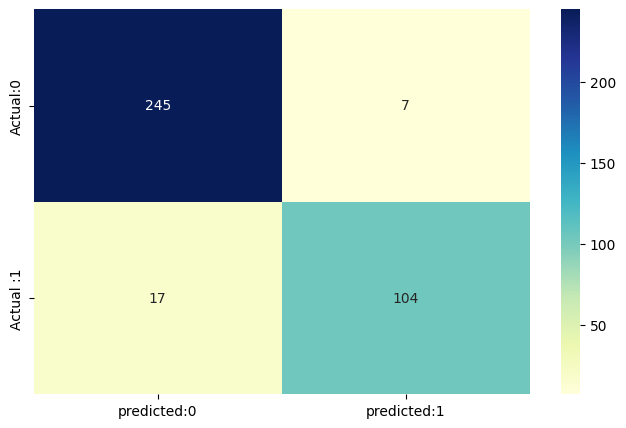

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=["predicted:0","predicted:1"],index=["Actual:0","Actual :1"])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu");
print(accuracy_score(y_test,y_pred))

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf=make_pipeline(StandardScaler(),SVC(gamma="auto"))
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

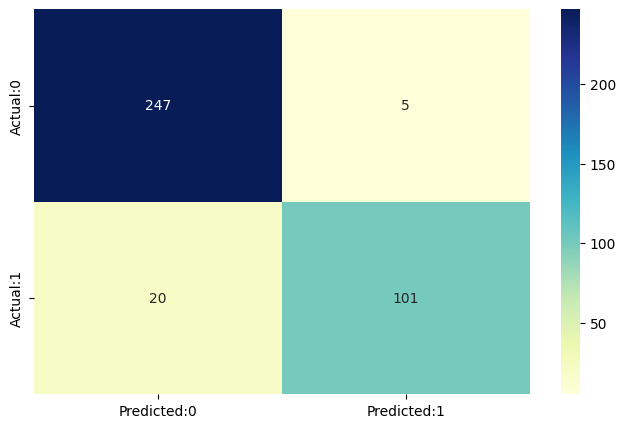

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt 
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");